In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
import numpy as np
import seaborn as sns

In [5]:
#  Load dataset
#  https://www.kaggle.com/c/titanic/data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
cdc.to_csv('cdc.csv',index=False)

<AxesSubplot:>

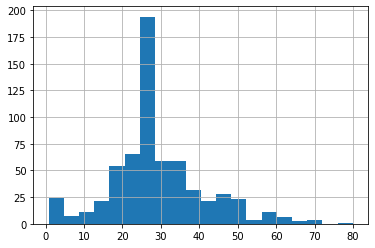

In [7]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

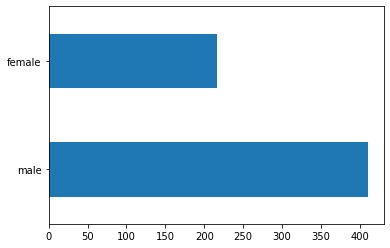

In [8]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

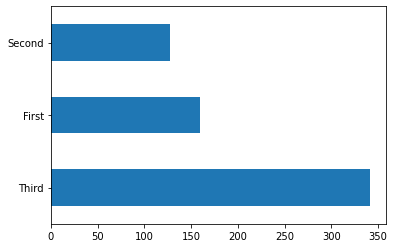

In [9]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

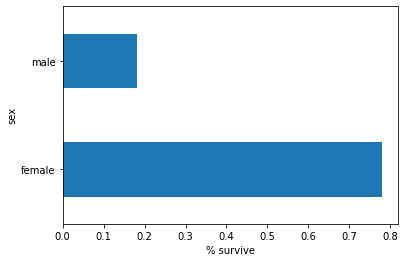

In [10]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [11]:
dftrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [12]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
CATEGORIAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']


NUMERICAL_COLUMNS = ['age', 'fare']
feature_columns = []

for feature_name in CATEGORIAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [10]:
def make_input_fn(data_df, label_df, num_epochs=30, shuffle=True, batch_size=64):
  def input_function(): # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # create tf.data.Dataset object with data and its labels
    if shuffle:
      ds = ds.shuffle(1000) # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for no. of epochs
    return ds
  return input_function # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train) # here we will call the input_function that was returned to us to get a dataset object we can fit into the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data
clear_output()
print(result) # result variable is a dict of stats about our model

{'accuracy': 0.7765152, 'accuracy_baseline': 0.625, 'auc': 0.8359351, 'auc_precision_recall': 0.79221797, 'average_loss': 0.47164637, 'label/mean': 0.375, 'loss': 0.44831577, 'precision': 0.72727275, 'prediction/mean': 0.35152096, 'recall': 0.64646465, 'global_step': 300}


In [27]:
linear_est.get_variable_names()

['global_step',
 'linear/linear_model/age/weights',
 'linear/linear_model/alone/weights',
 'linear/linear_model/bias_weights',
 'linear/linear_model/class/weights',
 'linear/linear_model/deck/weights',
 'linear/linear_model/embark_town/weights',
 'linear/linear_model/fare/weights',
 'linear/linear_model/n_siblings_spouses/weights',
 'linear/linear_model/parch/weights',
 'linear/linear_model/sex/weights',
 'training/Ftrl/beta',
 'training/Ftrl/decay',
 'training/Ftrl/l1_regularization_strength',
 'training/Ftrl/l2_regularization_strength',
 'training/Ftrl/learning_rate',
 'training/Ftrl/learning_rate_power',
 'training/Ftrl/linear/linear_model/age/weights/accumulator',
 'training/Ftrl/linear/linear_model/age/weights/linear',
 'training/Ftrl/linear/linear_model/alone/weights/accumulator',
 'training/Ftrl/linear/linear_model/alone/weights/linear',
 'training/Ftrl/linear/linear_model/bias_weights/accumulator',
 'training/Ftrl/linear/linear_model/bias_weights/linear',
 'training/Ftrl/linear

In [28]:
linear_est.get_variable_value('linear/linear_model/age/weights')

array([[-0.04100609]], dtype=float32)

In [29]:
linear_est.get_variable_value('training/Ftrl/linear/linear_model/age/weights/linear')

array([[15.329452]], dtype=float32)

In [15]:
result = list(linear_est.predict(eval_input_fn)) # <-- this is a generator object 
clear_output()
print(result[5])
print(y_eval.loc[5])

{'logits': array([1.0220127], dtype=float32), 'logistic': array([0.7353645], dtype=float32), 'probabilities': array([0.26463553, 0.7353645 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}
1


In [16]:
dfeval2 = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

<AxesSubplot:>

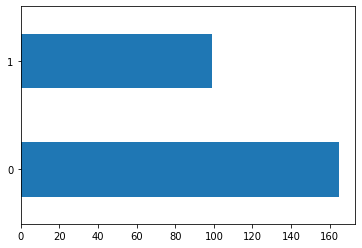

In [17]:
dfeval2['survived'].value_counts().plot(kind='barh')

In [18]:
dfeval2['survived'].value_counts()

0    165
1     99
Name: survived, dtype: int64

In [19]:
dfeval2['survived'].values.reshape(len(dfeval2['survived']),1)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [20]:
sns.pairplot(dfeval2,hue='survived')

AttributeError: module 'seaborn' has no attribute 'pairplot'

In [ ]:
plt.scatter(x=x,y=y)
plt.plot(np.linspace(0,100,100),np.linspace(0,100,100), color='r')

plt.show()


In [106]:
plt.xlabel

'hi'

In [65]:
np.linspace(0, 100, 100)

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [47]:
x = []
y = []

for _ in range(100):
    x.append(np.random.randint(0,100))
    y.append(np.random.randint(0,100))
